In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [22]:
train = pd.read_csv('train.csv')

In [23]:
test = pd.read_csv('test.csv')

In [24]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [27]:
train.duplicated().value_counts()

False    1460
dtype: int64

In [28]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [29]:
df1 = train[['GrLivArea','GarageCars', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'BedroomAbvGr', 
             'FullBath', 'HalfBath', 'TotalBsmtSF','SalePrice']]

In [30]:
df1.head()

,GrLivArea,GarageCars,LotArea,OverallQual,OverallCond,YearBuilt,BedroomAbvGr,FullBath,HalfBath,TotalBsmtSF,SalePrice
0,1710,2,8450,7,5,2003,3,2,1,856,208500
1,1262,2,9600,6,8,1976,3,2,0,1262,181500
2,1786,2,11250,7,5,2001,3,2,1,920,223500
3,1717,3,9550,7,5,1915,3,1,0,756,140000
4,2198,3,14260,8,5,2000,4,2,1,1145,250000


In [33]:
X = df1.drop('SalePrice',axis = 1)
y = df1.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)


In [35]:
X1_train = X_train[['GrLivArea','GarageCars', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'BedroomAbvGr', 
             'FullBath', 'HalfBath', 'TotalBsmtSF']]

X1_test = X_test[['GrLivArea','GarageCars', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'BedroomAbvGr', 
             'FullBath', 'HalfBath', 'TotalBsmtSF']]

y1_train = y_train

y1_test = y_test

In [36]:
from sklearn.linear_model import LinearRegression

linearmodel1 = LinearRegression().fit(X1_train,y1_train)

In [37]:
coef = linearmodel1.score(X1_train, y1_train)
print('Coefficient of Determination:', coef)

Coefficient of Determination: 0.767007638035641


In [38]:
y1_pred = linearmodel1.predict(X1_test)
print(f'intercept/constant = {linearmodel1.intercept_}')
coef_df = pd.DataFrame(linearmodel1.coef_, X1_test.columns, columns=['Coefficient'])
coef_df

intercept/constant = -1013870.7929293211


,Coefficient
GrLivArea,56.886857
GarageCars,15287.487134
LotArea,0.615953
OverallQual,19039.264947
OverallCond,5620.105730
YearBuilt,473.962213
BedroomAbvGr,-6621.100522
FullBath,-3499.976312
HalfBath,-2252.221406
TotalBsmtSF,16.696500


In [40]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y1_test, y1_pred)
mse = metrics.mean_squared_error(y1_test, y1_pred)
rmse = metrics.mean_squared_error(y1_test, y1_pred,squared = False)

print('Coefficient of Determination: {:.2f}'.format(coef*100))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Coefficient of Determination: 76.70
Mean Absolute Error: 23169.463327431065
Mean Square Error: 1289591995.8613052
Root Mean Square Error: 35910.88965566441


<AxesSubplot:>

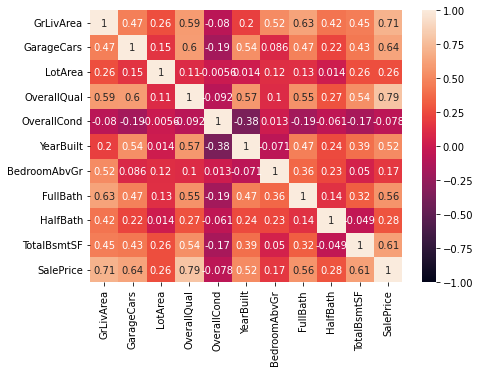

In [42]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

In [44]:
df2 = train[['GrLivArea','GarageCars','GarageArea','OverallQual','YearBuilt', 
             'FullBath', 'TotalBsmtSF','PoolArea','1stFlrSF','2ndFlrSF','SalePrice']]

In [45]:
df2.head()

,GrLivArea,GarageCars,GarageArea,OverallQual,YearBuilt,FullBath,TotalBsmtSF,PoolArea,1stFlrSF,2ndFlrSF,SalePrice
0,1710,2,548,7,2003,2,856,0,856,854,208500
1,1262,2,460,6,1976,2,1262,0,1262,0,181500
2,1786,2,608,7,2001,2,920,0,920,866,223500
3,1717,3,642,7,1915,1,756,0,961,756,140000
4,2198,3,836,8,2000,2,1145,0,1145,1053,250000


In [46]:
X2 = df2.drop('SalePrice',axis = 1)
y2 = df2.SalePrice

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state = 42)

In [50]:
X3_train = X2_train[['GrLivArea','GarageCars','GarageArea','OverallQual','YearBuilt', 
             'FullBath', 'TotalBsmtSF','PoolArea','1stFlrSF','2ndFlrSF']]

X3_test = X2_test[['GrLivArea','GarageCars','GarageArea','OverallQual','YearBuilt', 
             'FullBath', 'TotalBsmtSF','PoolArea','1stFlrSF','2ndFlrSF']]

y3_train = y2_train

y3_test = y2_test

In [55]:
from sklearn.linear_model import LinearRegression
linearmodel2 = LinearRegression().fit(X3_train,y3_train)
coef = linearmodel2.score(X3_train, y3_train)
print('Coefficient of Determination:', coef)

Coefficient of Determination: 0.7527064532974489


In [57]:
y3_pred = linearmodel2.predict(X3_test)
print(f'intercept/constant = {linearmodel2.intercept_}')
coef_df = pd.DataFrame(linearmodel2.coef_, X3_test.columns, columns=['Coefficient'])
coef_df

intercept/constant = -788565.6161852025


,Coefficient
GrLivArea,34.549507
GarageCars,14401.583127
GarageArea,6.522635
OverallQual,20916.436617
YearBuilt,363.864840
FullBath,-5359.429605
TotalBsmtSF,11.574310
PoolArea,-23.372264
1stFlrSF,29.178387
2ndFlrSF,14.230371


In [58]:
mae = metrics.mean_absolute_error(y3_test, y3_pred)
mse = metrics.mean_squared_error(y3_test, y3_pred)
rmse = metrics.mean_squared_error(y3_test, y3_pred,squared = False)

print('Coefficient of Determination: {:.2f}'.format(coef*100))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Coefficient of Determination: 75.27
Mean Absolute Error: 24746.28069235366
Mean Square Error: 1397246805.4946802
Root Mean Square Error: 37379.76465274601


<AxesSubplot:>

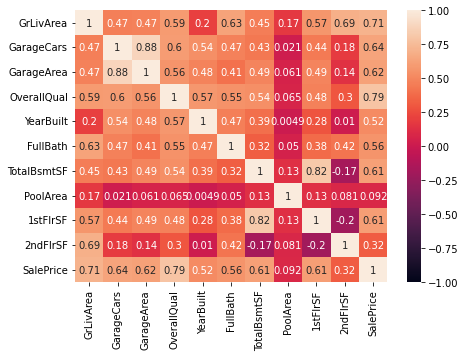

In [59]:
plt.figure(figsize=(7,5))
sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

In [60]:
df3 = train[['GrLivArea','GarageCars','GarageArea','OverallQual',
             'TotalBsmtSF','1stFlrSF','SalePrice']]

In [61]:
X4 = df3.drop('SalePrice',axis = 1)
y4 = df3.SalePrice

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3,random_state = 42)

In [63]:
X5_train = X4_train[['GrLivArea','GarageCars','GarageArea','OverallQual',
             'TotalBsmtSF','1stFlrSF']]

X5_test = X4_test[['GrLivArea','GarageCars','GarageArea','OverallQual',
             'TotalBsmtSF','1stFlrSF']]

y5_train = y4_train

y5_test = y4_test

In [64]:
linearmodel3 = LinearRegression().fit(X5_train,y5_train)
coef = linearmodel3.score(X5_train, y5_train)
print('Coefficient of Determination:', coef)

Coefficient of Determination: 0.7422166739647797


In [65]:
y5_pred = linearmodel3.predict(X5_test)
print(f'intercept/constant = {linearmodel3.intercept_}')
coef_df = pd.DataFrame(linearmodel3.coef_, X5_test.columns, columns=['Coefficient'])
coef_df

intercept/constant = -97182.8542854054


,Coefficient
GrLivArea,38.939747
GarageCars,18521.363640
GarageArea,8.214766
OverallQual,24411.616900
TotalBsmtSF,17.769168
1stFlrSF,11.592507


In [66]:
mae = metrics.mean_absolute_error(y5_test, y5_pred)
mse = metrics.mean_squared_error(y5_test, y5_pred)
rmse = metrics.mean_squared_error(y5_test, y5_pred,squared = False)

print('Coefficient of Determination: {:.2f}'.format(coef*100))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Coefficient of Determination: 74.22
Mean Absolute Error: 25029.233107938315
Mean Square Error: 1435575102.1083243
Root Mean Square Error: 37888.98391496299
